# Projek Akhir Course "Belajar analisis data dengan Python" dari Dicoding x Bangkit Academy 2024 Batch 2

### Nama : Jabir Muktabir

### Student ID : M206B4KY2033

# Menyiapkan semua library yang diperlukan

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling
### Gathering Data

In [3]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data
### Menilai tabel **day_df**

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
print("Jumlah data yang duplikat : ", day_df.duplicated().sum())

Jumlah data yang duplikat :  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel **hour_df**

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [13]:
print("Jumlah data yang duplikat : ", hour_df.duplicated().sum())

Jumlah data yang duplikat :  0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Cleaning Data

### Membersihkan tabel **day_df**

#### Mengubah Tipe data dari kolom "dteday"

In [15]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
day_df.to_csv('day_data_bersih.csv', index=False)

### Membersihkan tabel **hour_df**

#### Mengubah tipe data dari kolom "dteday"

In [18]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
hour_df.to_csv('hour_data_bersih.csv', index=False)

# Exploratory Data Analysis (EDA)

### Explore **day_df**

In [21]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627
36,37,2011-02-06,1,0,2,0,0,0,1,0.285833,0.291671,0.568333,0.141800,354,1269,1623
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431
280,281,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409
658,659,2012-10-20,4,1,10,0,6,0,1,0.484167,0.472842,0.572917,0.117537,2806,5284,8090


In [22]:
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [23]:
day_df.instant.is_unique

True

In [24]:
day_df.groupby(by='season').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [25]:
day_df.groupby(by='workingday').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

In [26]:
day_df.groupby(by='weathersit').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

In [27]:
day_df.groupby(by='weekday').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

### Explore **hour_df**

In [28]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7219,7220,2011-11-02,4,0,11,10,0,3,1,1,0.40,0.4091,0.71,0.0896,25,108,133
13825,13826,2012-08-04,3,1,8,6,0,6,0,1,0.70,0.6667,0.84,0.2239,12,37,49
5372,5373,2011-08-16,3,0,8,18,0,2,1,1,0.76,0.6818,0.45,0.2239,54,516,570
5012,5013,2011-08-01,3,0,8,18,0,1,1,1,0.78,0.6970,0.43,0.1940,68,475,543
3843,3844,2011-06-14,2,0,6,1,0,2,1,1,0.60,0.6212,0.49,0.2537,3,10,13


In [29]:
hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [30]:
hour_df.instant.is_unique

True

In [31]:
hour_df.groupby(by='hr').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

# Visualization & Explanatory Analysis

In [32]:
# Mengatur style seaborn
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'

### Bagaimana pengaruh musim terhadap total penyewaan sepeda?

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_13976\3391942019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='season_name', y='cnt', data=day_df, palette='coolwarm')
c:\Users\My ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\My ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gr

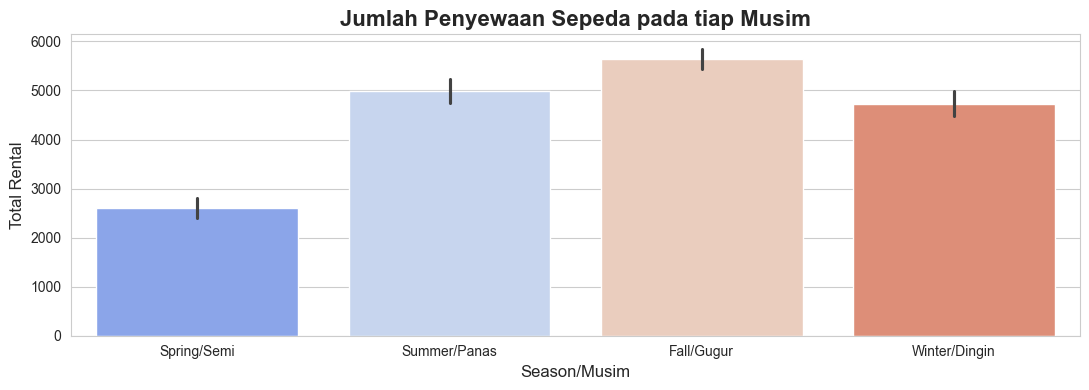

In [33]:
# 1. Total Penyewaan Sepeda berdasarkan Musim
season_map = {1: 'Spring/Semi', 2: 'Summer/Panas', 3: 'Fall/Gugur', 4: 'Winter/Dingin'}
day_df['season_name'] = day_df['season'].map(season_map)

plt.figure(figsize=(11, 4))
ax = sns.barplot(x='season_name', y='cnt', data=day_df, palette='coolwarm')
plt.title('Jumlah Penyewaan Sepeda pada tiap Musim', fontsize=16, fontweight='bold')
plt.xlabel('Season/Musim', fontsize=12)
plt.ylabel('Total Rental', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Dari visualisasi, terlihat bahwa jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall), diikuti oleh musim panas (Summer), kemudian musim dingin (Winter), dan terakhir musim semi (Spring).

### Bagaimana tren penggunaan sepeda berdasarkan bulan dalam setahun?

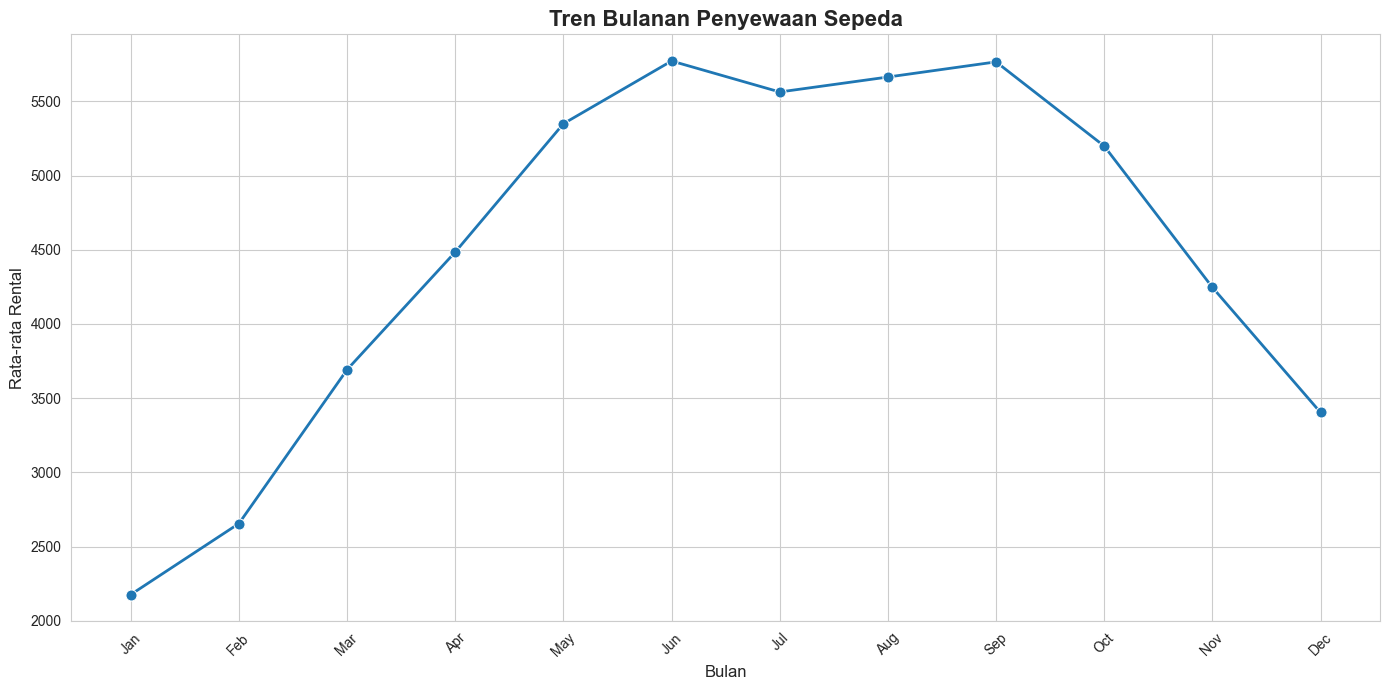

In [34]:
# 2. Tren Penggunaan Sepeda berdasarkan Bulan
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
monthly_data = day_df.groupby('mnth')['cnt'].mean().reset_index()
monthly_data['month_name'] = monthly_data['mnth'].map(month_map)

plt.figure(figsize=(14, 7))
sns.lineplot(x='month_name', y='cnt', data=monthly_data, marker='o', linewidth=2, markersize=8)
plt.title('Tren Bulanan Penyewaan Sepeda', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Rental', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

Tren penyewaan sepeda menunjukkan puncak tertinggi pada bulan Juni (musim panas) dan bulan September (musim gugur), yang menandakan aktivitas penyewaan lebih tinggi selama kedua bulan tersebut.

### Apakah ada pola dalam penggunaan sepeda berdasarkan hari dalam seminggu?

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_13976\4180467705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='weekday_name', y='cnt', data=day_df, palette='coolwarm')
c:\Users\My ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\My ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_g

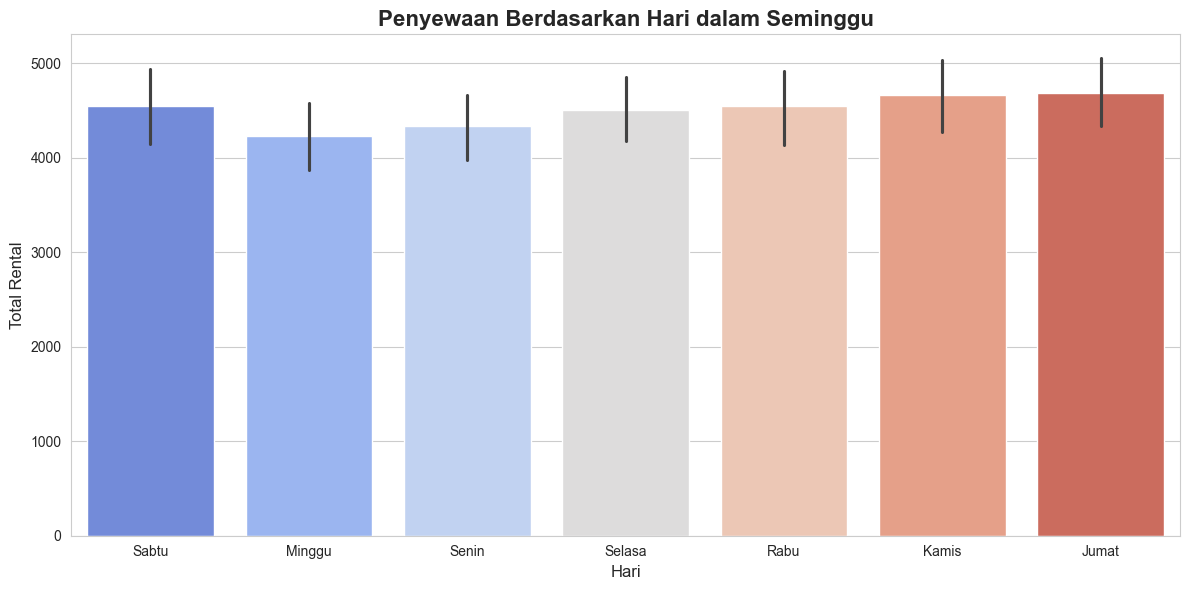

In [35]:
# 3. Pola Penggunaan Sepeda berdasarkan Hari dalam Seminggu
day_map = {0:'Minggu', 1:'Senin', 2:'Selasa', 3:'Rabu', 4:'Kamis', 5:'Jumat', 6:'Sabtu'}
day_df['weekday_name'] = day_df['weekday'].map(day_map)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='weekday_name', y='cnt', data=day_df, palette='coolwarm')
plt.title('Penyewaan Berdasarkan Hari dalam Seminggu', fontsize=16, fontweight='bold')
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Total Rental', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

Data penyewaan sepeda rata-rata tertinggi terjadi pada hari Kamis, Jumat, dan Sabtu, yang menunjukkan peningkatan aktivitas penyewaan saat mendekati akhir pekan.

### Apakah Hari Libur/Holiday mempengaruhi jumlah penyewaan sepeda?

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_13976\1405457640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='holiday_name', y='cnt', data=day_df, palette='coolwarm')
c:\Users\My ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\My ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_g

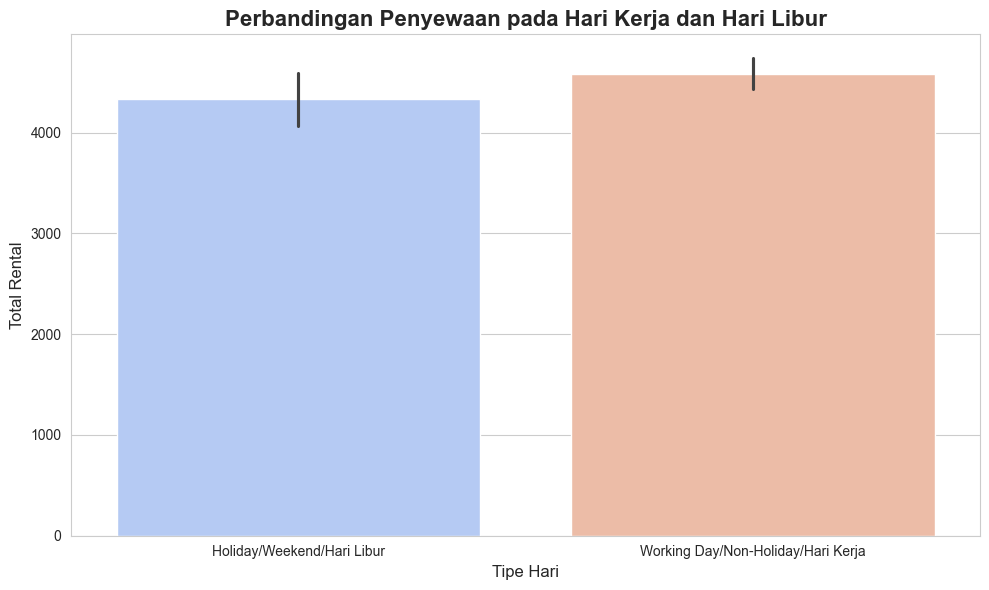

In [36]:
# 4. Pengaruh Hari Libur dan akhir pekan terhadap Jumlah Penyewaan Sepeda
holiday_map = {0: 'Holiday/Weekend/Hari Libur', 1: 'Working Day/Non-Holiday/Hari Kerja'}
day_df['holiday_name'] = day_df['workingday'].map(holiday_map)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='holiday_name', y='cnt', data=day_df, palette='coolwarm')
plt.title('Perbandingan Penyewaan pada Hari Kerja dan Hari Libur', fontsize=16, fontweight='bold')
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Total Rental', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

Visualisasi menunjukkan bahwa perbedaan penyewaan sepeda antara hari kerja dan akhir pekan/hari libur tidak terlalu signifikan. Walaupun penyewaan pada hari kerja lebih tinggi secara keseluruhan, jika mempertimbangkan jumlah hari, hari libur menunjukkan frekuensi penyewaan yang cukup tinggi, terutama pada akhir pekan seperti Jumat dan Sabtu.

### Bagaimana tren penyewaan sepeda untuk tiap jam berdasarkan rata-rata?

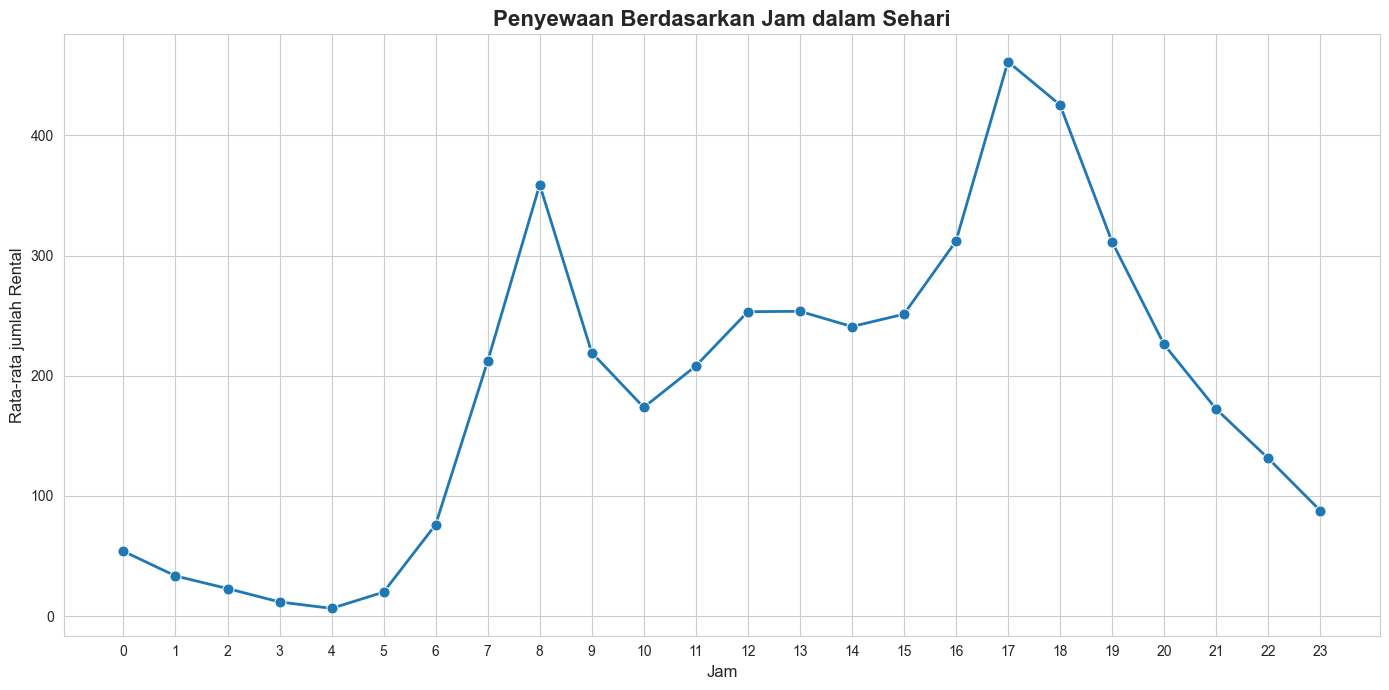

In [37]:
# 5. Jumlah Penyewaan Sepeda berdasarkan Jam
hourly_data = hour_df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='cnt', data=hourly_data, marker='o', linewidth=2, markersize=8)
plt.title('Penyewaan Berdasarkan Jam dalam Sehari', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata jumlah Rental', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

Dari visualisasi, terlihat bahwa jam-jam penyewaan sepeda tertinggi terjadi pada pukul 08:00 pagi, yang merupakan waktu orang berangkat kerja, sekolah, atau kuliah, dan pukul 17:00 sore, yang merupakan jam pulang kerja dan sekolah.

### Kesimpulan dari Visualisasi data di atas

Berdasarkan analisis data penyewaan sepeda, terlihat bahwa musim gugur dan musim panas mendominasi jumlah penyewaan sepeda, dengan penyewaan tertinggi terjadi pada bulan Juni dan September. Hal ini menunjukkan bahwa pengguna lebih aktif menyewa sepeda ketika cuaca sedang hangat dan nyaman. Musim dingin dan musim semi cenderung memiliki jumlah penyewaan yang lebih rendah, tetapi tetap ada aktivitas yang stabil. Tren penyewaan juga menunjukkan peningkatan aktivitas menjelang akhir pekan, terutama pada hari Jumat dan Sabtu, menandakan adanya preferensi pengguna untuk bersepeda di waktu luang saat mendekati akhir pekan. Selain itu, meskipun hari kerja secara keseluruhan memiliki penyewaan yang lebih tinggi, frekuensi penyewaan pada hari libur juga cukup signifikan, dengan peningkatan aktivitas terutama pada akhir pekan. Pola penyewaan harian menunjukkan dua puncak utama, yaitu di pagi hari sekitar pukul 08:00, ketika banyak orang berangkat kerja atau sekolah, dan di sore hari sekitar pukul 17:00, saat jam pulang.

### Saran Keputusan untuk Perusahaan Penyewa Sepeda:
1. **Tingkatkan Ketersediaan Sepeda pada Musim Gugur dan Musim Panas**: Mengingat dominasi penyewaan pada bulan-bulan ini, perusahaan dapat meningkatkan jumlah sepeda yang tersedia selama musim panas dan gugur, terutama pada bulan Juni dan September, ketika permintaan mencapai puncaknya.

2. **Strategi Pemasaran Musiman**: Meningkatkan pemasaran secara agresif selama musim panas dan gugur akan efektif, karena ini adalah periode dengan permintaan tertinggi. Promosi, Penawaran diskon penyewaan, atau keanggotaan khusus musim panas dapat menarik perhatian calon pengguna.

3. **Optimalkan Penyewaan pada Akhir Pekan**: Melihat tren peningkatan penyewaan menjelang akhir pekan, terutama pada hari Jumat dan Sabtu, perusahaan sebaiknya meningkatkan ketersediaan sepeda di hari-hari ini. Peningkatan penawaran pada akhir pekan, seperti paket sewa sehari penuh atau penawaran khusus untuk sewa grup, keputusan ini dapat meningkatkan pendapatan perusahaan.

4. **Promosi untuk Hari Libur**: Meskipun hari kerja menunjukkan volume penyewaan yang lebih tinggi, penyewaan pada hari libur memiliki frekuensi yang cukup kuat. Oleh karena itu, perusahaan bisa mempertimbangkan untuk melakukan promosi atau paket khusus selama liburan dan akhir pekan, untuk menarik lebih banyak pengguna yang ingin bersepeda untuk rekreasi, refreshing, dll.

5. **Penempatan Sepeda di Pagi dan Sore Hari**: Melihat pola penggunaan sepeda pada pukul 08:00 dan 17:00, perusahaan harus memastikan bahwa jumlah sepeda yang memadai tersedia di pagi dan sore hari di daerah yang banyak dilalui pekerja atau pelajar. Menambah jumlah sepeda di sekitar perkantoran, sekolah, atau stasiun transportasi seperti kereta,bus, atau transportasi umum lainnya, dapat membantu memenuhi permintaan tinggi di jam-jam sibuk.

6. **Pengelolaan Sepeda di Musim Rendah**: Meskipun musim dingin dan musim semi memiliki jumlah penyewaan lebih rendah, perusahaan dapat mempertimbangkan strategi khusus seperti menurunkan tarif atau menawarkan paket langganan yang lebih murah selama periode tersebut untuk menjaga minat pengguna.

7. **Pemeliharaan Sepeda di Musim Dingin**: Karena penyewaan di musim dingin lebih rendah, ini adalah waktu yang baik bagi perusahaan untuk melakukan pemeliharaan/perbaikan sepeda-sepeda yang disewakan. Dengan demikian, sepeda akan siap dalam kondisi optimal untuk musim sibuk berikutnya.


### Manual Clustering Jumlah Penyewaan Sepeda terhadap Suhu

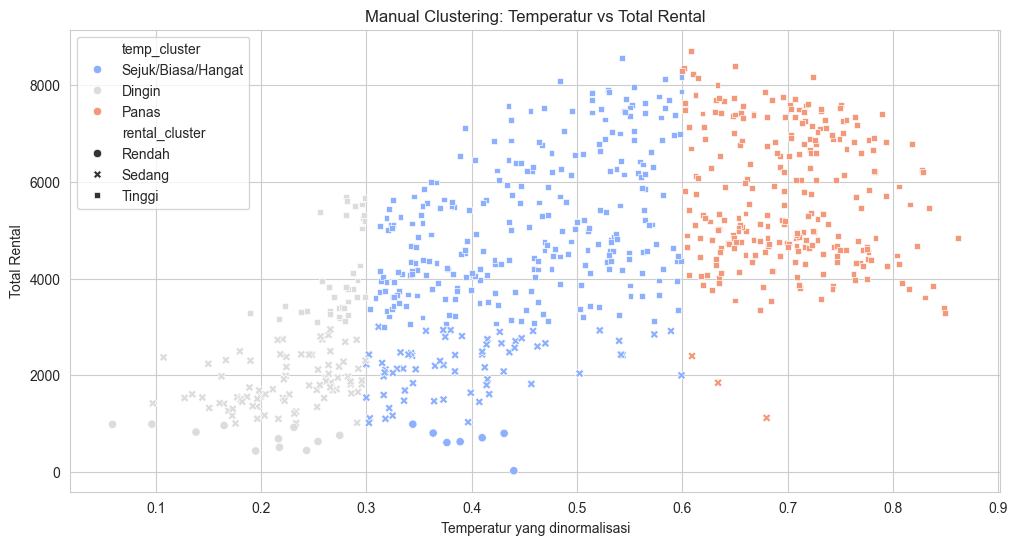

In [38]:
def temp_cluster(temp):
    if temp < 0.3:
        return 'Dingin'
    elif temp < 0.6:
        return 'Sejuk/Biasa/Hangat'
    else:
        return 'Panas'

def rental_cluster(cnt):
    if cnt < 1000:
        return 'Rendah'
    elif cnt < 3000:
        return 'Sedang'
    else:
        return 'Tinggi'
    
day_df['temp_cluster'] = day_df['temp'].apply(temp_cluster)
day_df['rental_cluster'] = day_df['cnt'].apply(rental_cluster)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', hue='temp_cluster', style='rental_cluster', data=day_df, palette='coolwarm')
plt.title('Manual Clustering: Temperatur vs Total Rental')
plt.xlabel('Temperatur yang dinormalisasi')
plt.ylabel('Total Rental')
plt.show()

Manual Cluster di atas membantu untuk mengidentifikasi hubungan antara suhu lingkungan dan jumlah penyewaan sepeda, sambil membedakan kategori suhu (Cold, Moderate, Hot) dan kategori jumlah penyewaan (Low, Medium, High). Scatterplot yang dihasilkan memvisualisasikan data ini sehingga mudah terlihat pola atau kecenderungan tertentu, misalnya apakah ada hubungan yang kuat antara suhu dan jumlah penyewaan atau bagaimana suhu panas berpengaruh pada peningkatan penyewaan.

Dari hasil manual clustering tersebut, terlihat adanya peningkatan penyewaan sepeda pada rentang suhu antara 0.5 (Moderate) hingga 0.7 (Hot). Peningkatan ini sejalan dengan tren penyewaan yang lebih tinggi pada musim panas dan musim gugur, ketika suhu cenderung berada di kisaran tersebut.